15.03.2024
## Głębokie uczenie

# 1. Problem klasyfikacji wieloklasowej z wykorzystaniem Kerasa


# Multi-class classification problem

In the previous exercise, you have classified vector inputs into two mutually exclusive classes using a densely-connected neural network. But what happens when you have more than two classes?

Now, you will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. Since we have many classes, this problem is an instance of “multi-class classification”, and since each data point should be classified into only one category, the problem is more specifically an instance of “single-label, the multi-class classification”. If each data point could have belonged to multiple categories (in our case, topics) then we would be facing a “multi-label, multi-class classification” problem.

**The Reuters dataset**

The Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986. It's a very simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set. Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras.



In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
train_labels[4]

4

In [6]:
test_labels[0]

3

In [7]:
len(test_labels)

2246

**Preparing the data**

Please vectorize the data with the exact same code as in our previous ex.

In [8]:
# TO DO: Vectorize the data as before
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
print(x_train)
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


Then vectorize the labels using “one-hot” encoding. One-hot encoding is a widely used format for categorical data, also called “categorical encoding”. In our case, one-hot encoding of our labels consists in embedding each label as an all-zero vector (dimension=46) with a 1 in the place of the label index. There is a built-in way to do this in Keras:

In [10]:
# TO DO: Convert labels to categorical format
import numpy as np

def one_hot_encode(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
one_hot_train_labels.shape

(8982, 46)

Network architecture

In this example we have a new constraint: the number of output classes has gone from 2 to 46, i.e. the dimensionality of the output space is much larger. In our previous example, we were using 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information. In this exercise please use 64 units to build the DNN.

Network architecture:

1. two intermediate layers with 64 hidden units each, and an activation function relu
2. third Dense layer of size 46 which will end the network. This means that for each input sample, our network will output a 46-dimensional vector.
3. The last layer uses a softmax activation. It means that the network will output a probability distribution over the 46 different output classes, i.e. for every input sample, the network will produce a 46-dimensional output vector where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.


In [14]:
#TODO: Implement the architecture
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



Network training

Since we are facing a multi-class classification problem the best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the distance between these two distributions, we train our network to output something as close as possible to the true labels.

Parameters:
1. rmsprop optimizer
2. categorical_crossentropy loss function
3. accuracy metric


In [15]:
#TODO: Compile the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

**Validation**

Like in the previous ex. divide the training dataset into a 'validation set' by setting apart 20% samples.

For our example parameters (epochs = 20 and batch_size = 512) the network should achieve acc: 0.95 and val_acc: 0.80.

Display its loss and accuracy curves on a plot.

In [16]:
#TODO: Divide the model into train and validation dataset
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_val, one_hot_train_labels, one_hot_val_labels = train_test_split(x_train, one_hot_train_labels, test_size=0.2, random_state=42)

#TODO: model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# TODO: train the model
history = model.fit(x_train, one_hot_train_labels, epochs=20, batch_size=512, validation_data=(x_val, one_hot_val_labels))


Epoch 1/20
15/15 [==============================] - 1s 43ms/step - loss: 2.6818 - accuracy: 0.4951 - val_loss: 1.8415 - val_accuracy: 0.6138
Epoch 2/20
15/15 [==============================] - 0s 29ms/step - loss: 1.5828 - accuracy: 0.6669 - val_loss: 1.4558 - val_accuracy: 0.6945
Epoch 3/20
15/15 [==============================] - 0s 28ms/step - loss: 1.2423 - accuracy: 0.7279 - val_loss: 1.2865 - val_accuracy: 0.7095
Epoch 4/20
15/15 [==============================] - 0s 27ms/step - loss: 1.0375 - accuracy: 0.7751 - val_loss: 1.1779 - val_accuracy: 0.7295
Epoch 5/20
15/15 [==============================] - 0s 28ms/step - loss: 0.8758 - accuracy: 0.8029 - val_loss: 1.1314 - val_accuracy: 0.7329
Epoch 6/20
15/15 [==============================] - 1s 38ms/step - loss: 0.7433 - accuracy: 0.8316 - val_loss: 1.0558 - val_accuracy: 0.7652
Epoch 7/20
15/15 [==============================] - 1s 49ms/step - loss: 0.6299 - accuracy: 0.8608 - val_loss: 0.9898 - val_accuracy: 0.7735
Epoch 8/20
15

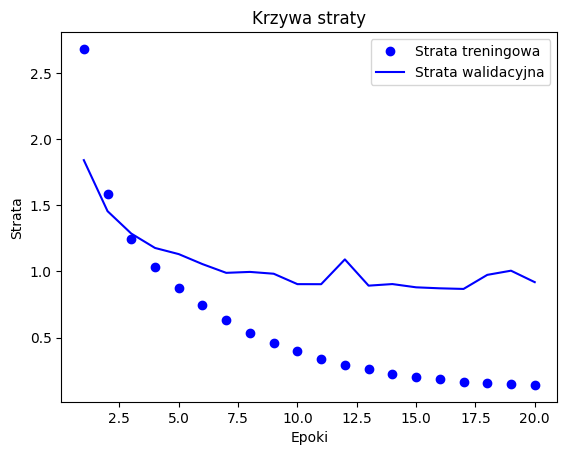

In [17]:
#TODO plot the results 1
import matplotlib.pyplot as plt
# krzywa straty
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Strata treningowa')
plt.plot(epochs, val_loss, 'b', label='Strata walidacyjna')
plt.title('Krzywa straty')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

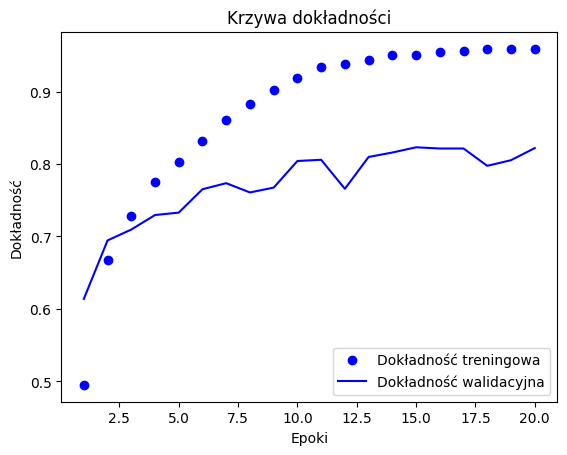

In [18]:
#TODO plot the results 2
# krzywa dokładności
plt.clf()   # Wyczyszczenie poprzedniego wykresu

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Dokładność treningowa')
plt.plot(epochs, val_acc, 'b', label='Dokładność walidacyjna')
plt.title('Krzywa dokładności')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()

plt.show()

**Task 1**
Po 8-ej epoce w krzywej dokładności zarówno dokładność treningowa jak i walidacyjna plasuje się później na dość stablinym poziomie, osiągając wartości dokładności takie, co już występiły wcześniej.
W przypadku krzywej straty, po 8-ej epoce strata walidacyjna również utrzymuje się na dość stabilnym poziomie, osiągając wartości, które występiły już we wcześniejszych fazach. Natomiast strata treningowa po 8-ej epoce osiąga stale mniejsze wartosci straty, na poziomie poniżej 0,5.

**Task 1:** Analyse the plots. What happens after the 8-th epoch? Train a new network for only 8 epochs. What can you say about the outcome ?

**Task 2:** Is a large intermediate layer necessary? Tain a network with only 4-dimensional intermediate layer.

**Task 3:** Experiment with different parameters and functions you learned in a lecture last week. You can change activation functions, optimizer or the number of neurons and layers. Train the network three times, with three different sets of parameters and discuss the results.




**Saving trained model**
Sometimes there is a need to save your model and returning to it later. You can save an entire model to a single file. It will include:


*   the model's architecture/config,
*   the model's weight values (which were learned during training),
*   the model's compilation information (if compile()) was called,
*   the optimizer and its state, if any (this enables you to restart training where you left).

A model can be saved in default TensorFlow format or in specific to Keras h5 format:

In [20]:
import keras

In [21]:
#Saving a model into a .h5 file
model.save('my_model.h5')

#Loading a model from file
reconstructed_model = keras.models.load_model("my_model.h5")